In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy
import math
import time

In [42]:
#C:\\Users\\jaink\\Downloads\\Logs\\Processed\\FRC_20220409_172816_CASJ_Q12.csv
df = pd.read_csv("./SVR Matches/Processed/FRC_20220408_203801_CASJ_P12.csv")

In [43]:
cols = ["NT:/SmartDashboard/HSSwerveDriveController/Theta Error", "NT:/SmartDashboard/HSSwerveDriveController/X Error"]
MAX = 10000000000000000000
MIN = -10000000000000000000

In [44]:
dfs = []
for col in cols:
    dfs.append(df.loc[df['Name'] == col])

In [45]:
vals = [[]for i in range(len(cols))]
times = [[] for i in range(len(cols))]
for df1 in range(len(dfs)):
    for i in range(len(dfs[df1])):
        vals[df1].append(float(dfs[df1].iloc[i]["Value"]))
        times[df1].append(float(dfs[df1].iloc[i]["Timestamp"]))


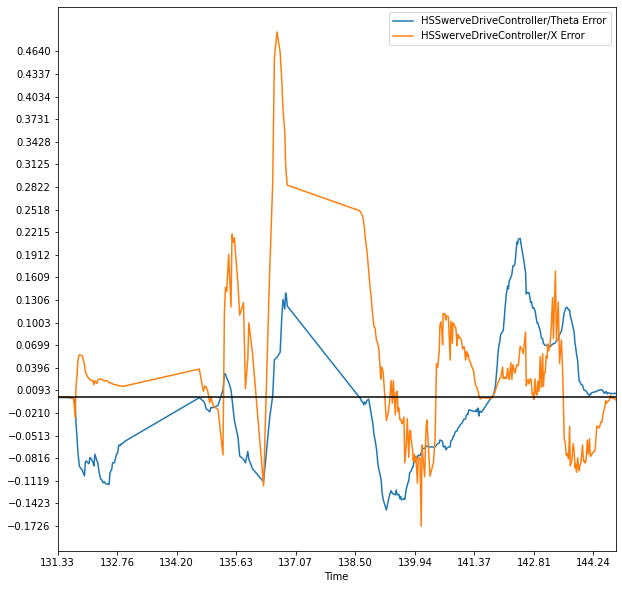

In [46]:
plt.figure(figsize=(10, 10))

for i in range(len(cols)):
    plt.plot(times[i], vals[i], label = cols[i].lstrip("NT:/SmartDashboard/") )

maxTime = MIN
minTime = MAX
maxVal = MIN
minVal = MAX
timeStampMax = MIN
timeStampMin = MAX
c = None
for i in range(len(cols)):
    if maxTime < max(times[i]):
        if c != None and i == c:
            timeStampMax = max(times[i])
        maxTime = max(times[i])
    if maxVal < max(vals[i]):
        maxVal = max(vals[i])
    if minVal > min(vals[i]):
        minVal = min(vals[i])
    if minTime > min(times[i]):
        if c != None and i == c:
            timeStampMin = min(times[i])
        minTime = min(times[i])

        
if timeStampMin != MAX and timeStampMax != MIN:
    plt.xticks(numpy.arange(timeStampMin, timeStampMax, (timeStampMax-timeStampMin)/len(times[0])*35))
    plt.xlim(timeStampMin, timeStampMax)
else:
    plt.xticks(numpy.arange(minTime, maxTime, (maxTime-minTime)/len(times[0])*35))
    plt.xlim(minTime, maxTime)

plt.yticks(numpy.arange(minVal, maxVal, (maxVal-minVal)/len(vals[0])*15))
plt.xlabel("Time")

plt.hlines(y=0, xmin=0, xmax=maxTime, color="black")
plt.legend()
plt.show()